In [1]:
# Load modules
from __future__ import print_function
import pandas as pd
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
import statsmodels.tsa.api as smtsa

In [2]:
# Function to plot signal, ACF and PACF
def plotds(xt, nlag=30, fig_size=(12, 10)):
    if not isinstance(xt, pd.Series):
         xt = pd.Series(xt)
    plt.figure(figsize=fig_size)
    layout = (2, 2)
    
    # Assign axes
    ax_xt = plt.subplot2grid(layout, (0, 0), colspan=2)
    ax_acf= plt.subplot2grid(layout, (1, 0))
    ax_pacf = plt.subplot2grid(layout, (1, 1))
    
    # Plot graphs
    xt.plot(ax=ax_xt)
    ax_xt.set_title('Time Series')
    plot_acf(xt, lags=50, ax=ax_acf)
    plot_pacf(xt, lags=50, ax=ax_pacf)
    plt.tight_layout()
    return None

<IPython.core.display.Javascript object>


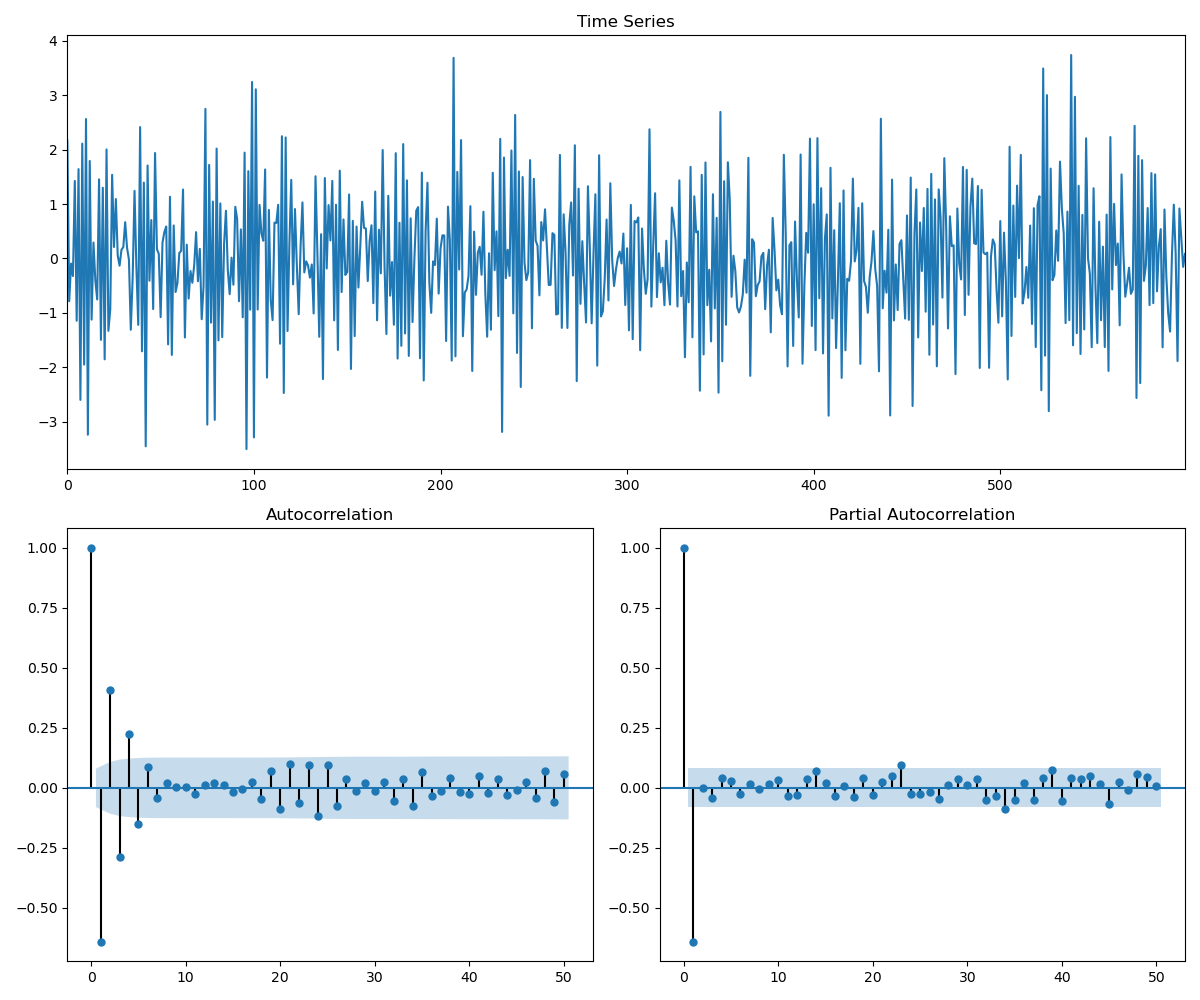

In [20]:
# Number of samples
n = 600

# Generate AR(1) dataset
ar = np.r_[1, 0.6]
ma = np.r_[1, 0]
ar1_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar1_data)

<IPython.core.display.Javascript object>


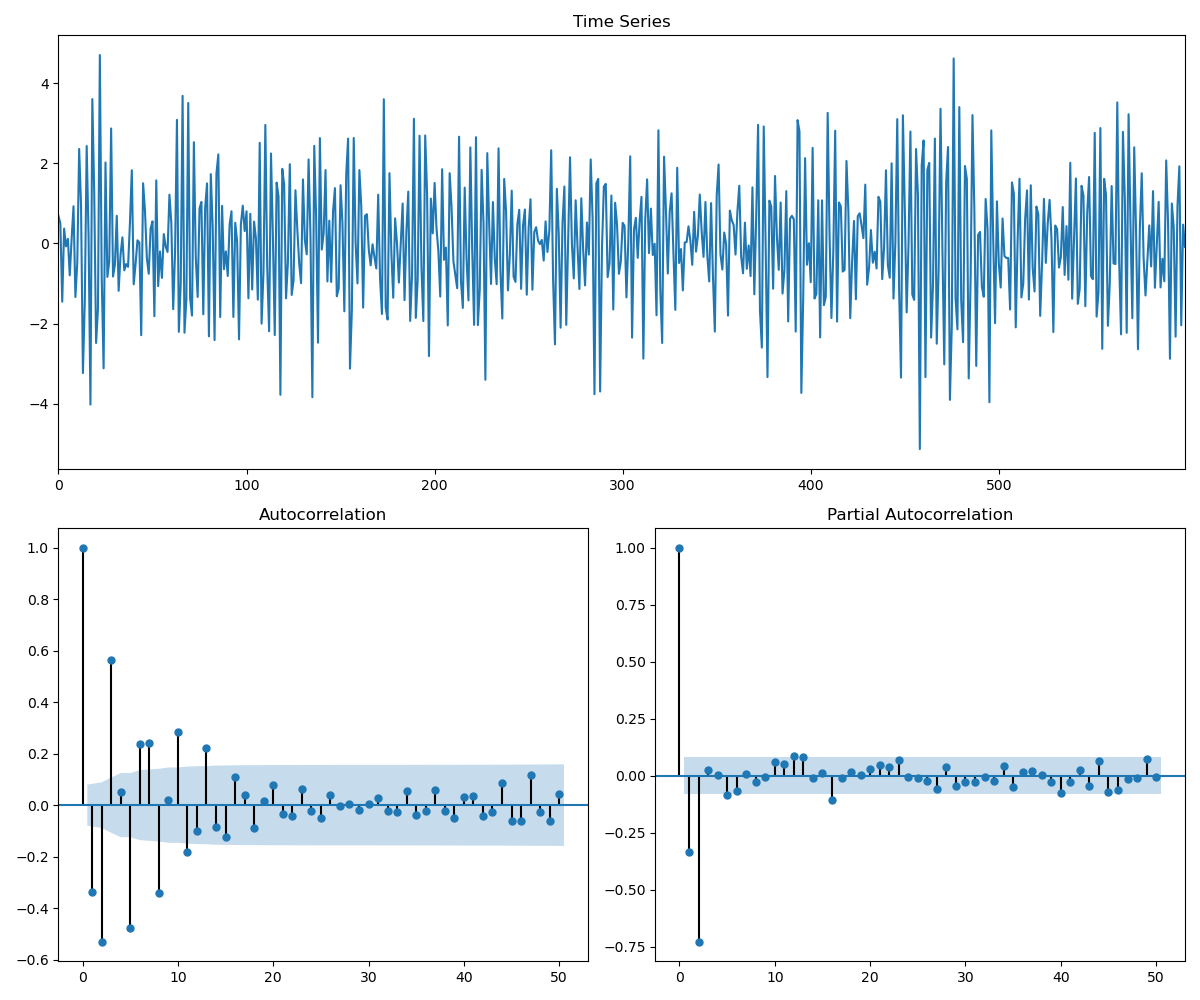

In [5]:
# Generate AR(2) dataset
ar = np.r_[1, 0.6, 0.7]
ma = np.r_[1, 0]
ar2_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar2_data)

<IPython.core.display.Javascript object>


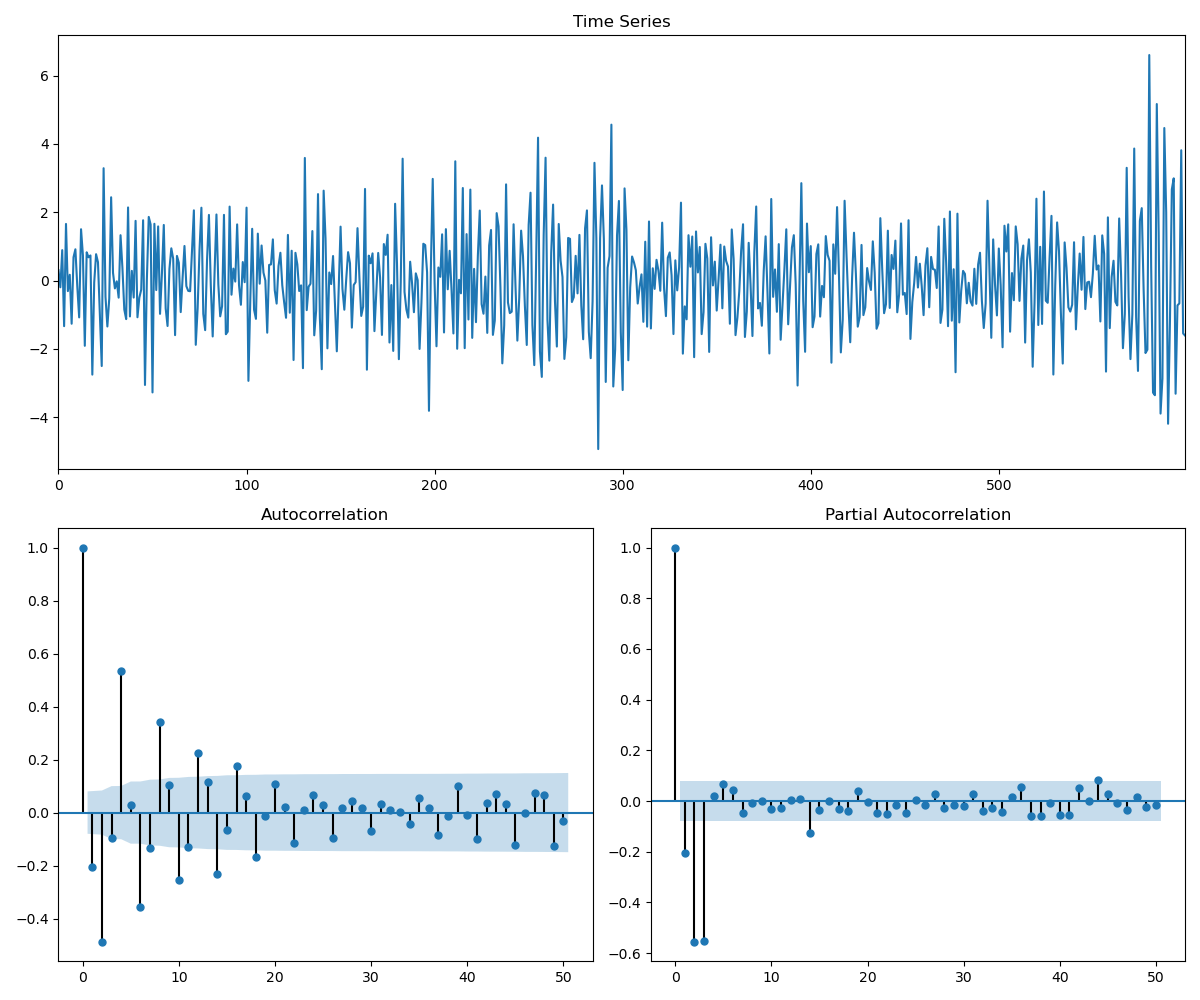

In [6]:
# Generate AR(3) dataset
ar = np.r_[1, 0.6, 0.7, 0.5]
ma = np.r_[1, 0]
ar3_data = smtsa.arma_generate_sample(ar=ar, ma=ma, nsample=n) 
plotds(ar3_data)


In [23]:
# Build AR(1) model
ar1model = smtsa.ARMA(ar1_data.tolist(), order=(1, 0))
ar1=ar1model.fit(maxlag=30, method='mle', trend='nc')
ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(1, 0)   Log Likelihood                -833.429
Method:                           mle   S.D. of innovations              0.970
Date:                Tue, 14 Apr 2020   AIC                           1670.857
Time:                        16:59:51   BIC                           1679.651
Sample:                             0   HQIC                          1674.281
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6411      0.031    -20.440      0.000      -0.703      -0.580
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5599           +0.0000j            1.5599            0.5000
-----------------------------------------------------------------------------
"""

In [8]:
# Build MA(3) model
ar3 = smtsa.ARMA(ar3_data.tolist(), order=(3, 0)).fit(
    maxlag=30, method='mle', trend='nc')
ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  600
Model:                     ARMA(3, 0)   Log Likelihood                -861.221
Method:                           mle   S.D. of innovations              1.015
Date:                Tue, 14 Apr 2020   AIC                           1730.442
Time:                        16:44:42   BIC                           1748.030
Sample:                             0   HQIC                          1737.289
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y       -0.6243      0.034    -18.313      0.000      -0.691      -0.558
ar.L2.y       -0.7289      0.030    -24.023      0.000      -0.788      -0.669
ar.L3.y       -0.5504      0.034    -16.114      0.000      -0.617      -0.483
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.0498           -1.1285j            1.1296           -0.2430
AR.2            0.0498           +1.1285j            1.1296            0.2430
AR.3           -1.4238           -0.0000j            1.4238           -0.5000
-----------------------------------------------------------------------------
"""